<a href="https://colab.research.google.com/github/Whyugstiaan/tugas-ml/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

CELL 1 — IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np

# visualisasi
import matplotlib.pyplot as plt
import seaborn as sns

# preprocessing & model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# evaluasi
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix


CELL 2 — LOAD DATASET (CSV)

In [10]:
# load dataset
df = pd.read_csv('/content/iris.csv')

# tampilkan 50 data pertama
df.head(50)


,150,4,setosa,versicolor,virginica
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


CELL 3 — EKSPLORASI DATA

In [4]:
df.rename(columns={'virginica': 'target'}, inplace=True)

# jumlah data & fitur
print("Jumlah data:", df.shape[0])
print("Jumlah fitur:", df.shape[1])

# nama fitur
print("\nNama fitur:")
print(df.columns)

# distribusi kelas target
print("\nDistribusi kelas target:")
print(df['target'].value_counts())

Jumlah data: 150
Jumlah fitur: 5

Nama fitur:
Index(['150', '4', 'setosa', 'versicolor', 'target'], dtype='object')

Distribusi kelas target:
target
0    50
1    50
2    50
Name: count, dtype: int64


CELL 4 — CEK KUALITAS DATA (Preprocessing)

In [5]:
# cek missing value
print("Missing value per kolom:")
print(df.isnull().sum())


Missing value per kolom:
150           0
4             0
setosa        0
versicolor    0
target        0
dtype: int64


CELL 5 — VISUALISASI DATA

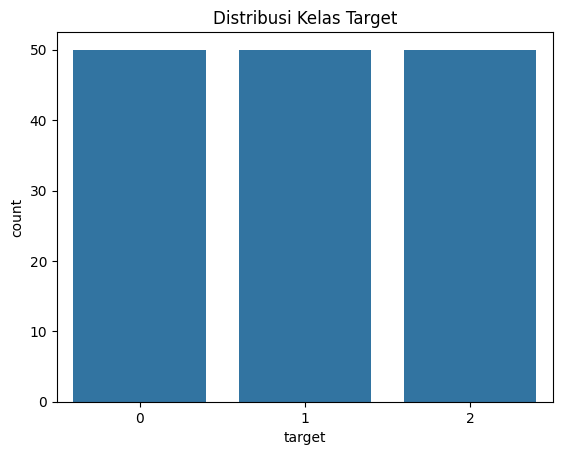

In [6]:
sns.countplot(x='target', data=df)
plt.title("Distribusi Kelas Target")
plt.show()


CELL 6 — PEMISAHAN FITUR & TARGET

In [7]:
X = df.drop('target', axis=1)
y = df['target']


CELL 7 — SPLIT DATA (70% TRAIN, 30% TEST)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

print("Data training:", X_train.shape)
print("Data testing:", X_test.shape)


Data training: (105, 4)
Data testing: (45, 4)
